In [1]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="1250",
    database="olist"
)

In [3]:
best_review_sql = """
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
        AVG(reviews.review_score) AS avg_review_score
    FROM
    	reviews
    INNER JOIN
    	order_items
    ON
    	reviews.order_id = order_items.order_id
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    ORDER BY
    	avg_review_score DESC;
"""

In [4]:
best_review_df = pd.read_sql(best_review_sql, conn)
best_review_df = best_review_df.set_index("category_name")
best_review_df.to_csv('best_review.csv', header=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_31472\4151704923.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  best_review_df = pd.read_sql(best_review_sql, conn)


In [5]:
best_review_df = best_review_df.head(10)

In [6]:
best_review_df

,avg_review_score
category_name,
cds_dvds_musicals,4.6429
fashion_childrens_clothes,4.5000
books_general_interest,4.4463
costruction_tools_tools,4.4444
flowers,4.4194
books_imported,4.4000
books_technical,4.3684
food_drink,4.3154
luggage_accessories,4.3153


In [7]:
best_review_df = best_review_df.sort_values(by="avg_review_score", ascending=True)

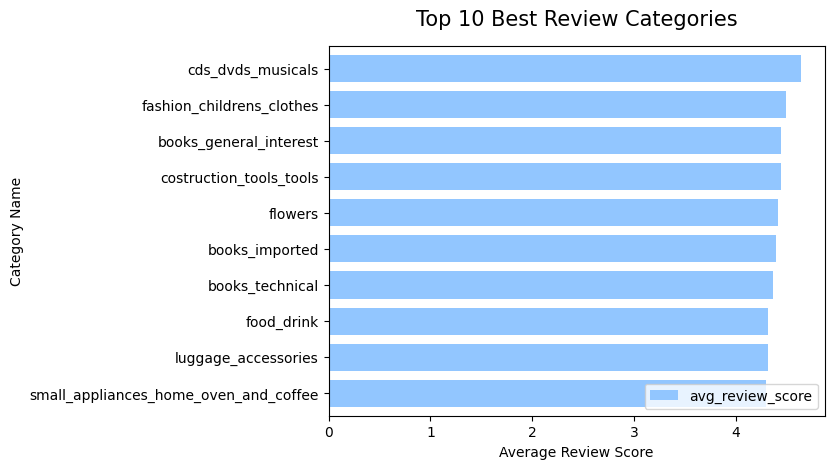

In [8]:
plt.style.use("seaborn-v0_8-pastel")
best_review_df.plot(kind="barh", width=0.75)
plt.title("Top 10 Best Review Categories", size=15, pad=15)
plt.xlabel("Average Review Score")
plt.ylabel("Category Name")
plt.legend(loc="lower right")
plt.savefig("best_review.png", bbox_inches='tight')